# Teena Bokde
# Data Science - Batch Oct 2024 (Pune) - Assignment 20
# Timeseries

# Task 1: Data Preparation and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Load the dataset

In [2]:
df = pd.read_csv('exchange_rate.csv')

In [3]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [ ]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [ ]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
df['date']

0      1990-01-01
1      1990-01-02
2      1990-01-03
3      1990-01-04
4      1990-01-05
          ...    
7583   2010-10-06
7584   2010-10-07
7585   2010-10-08
7586   2010-10-09
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

Initial Exploration

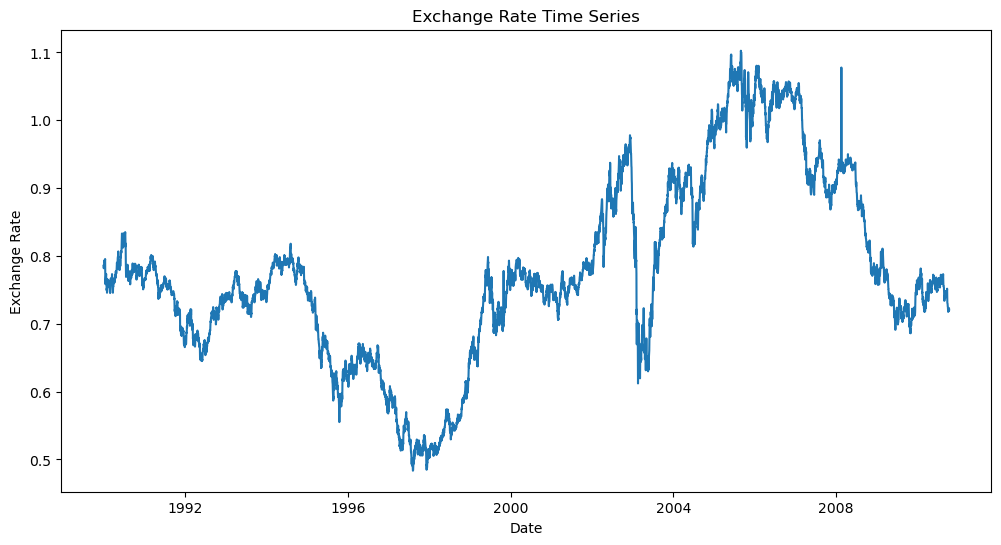

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Ex_rate'])
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.show()

Data Preprocessing

Checking for missing values

In [ ]:
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


Checking for anomalies

In [ ]:
Q1 = df['Ex_rate'].quantile(0.25)
Q3 = df['Ex_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['Ex_rate'] < lower_bound) | (df['Ex_rate'] > upper_bound)]

In [ ]:
print(anomalies)

Empty DataFrame
Columns: [date, Ex_rate]
Index: []


# Task 2: Model Building - ARIMA

Parameter Selection for ARIMA

Plotting the ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

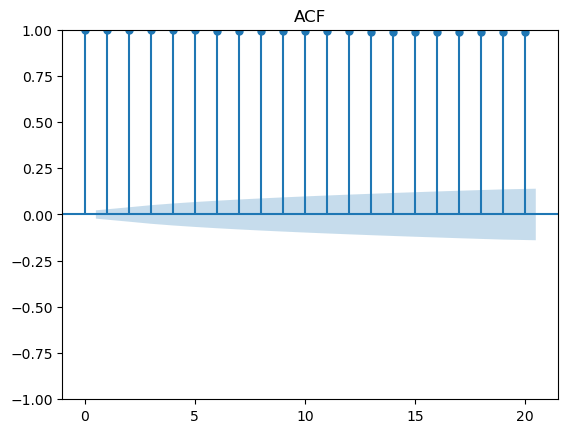

In [ ]:
plt.figure(figsize=(12,6))
plot_acf(df['Ex_rate'], lags=20)
plt.title('ACF')
plt.show()

<Figure size 1200x600 with 0 Axes>

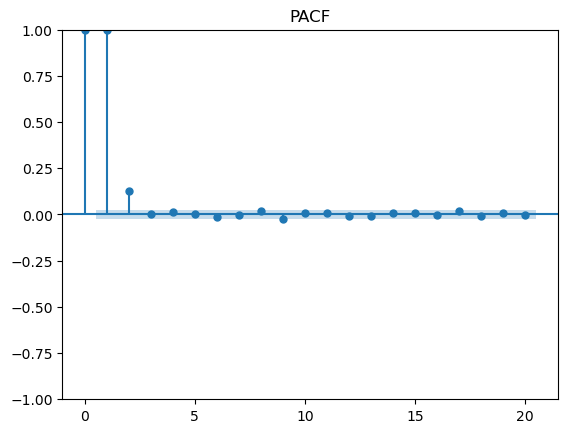

In [ ]:
plt.figure(figsize=(12,6))
plot_pacf(df['Ex_rate'], lags=20)
plt.title('PACF')
plt.show()

Model Fitting

Fitting the ARIMA model with the selected parameters to the preprocessed time series

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(df['Ex_rate'], order=(1,1,1))

# Fit the model
model_fit = model.fit()

C:\Users\PAVAN\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model

In [ ]:
model_fit

Diagnostics

Analyzing the residuals to ensure there are no patterns that might indicate model inadequacies

Plotting the residuals

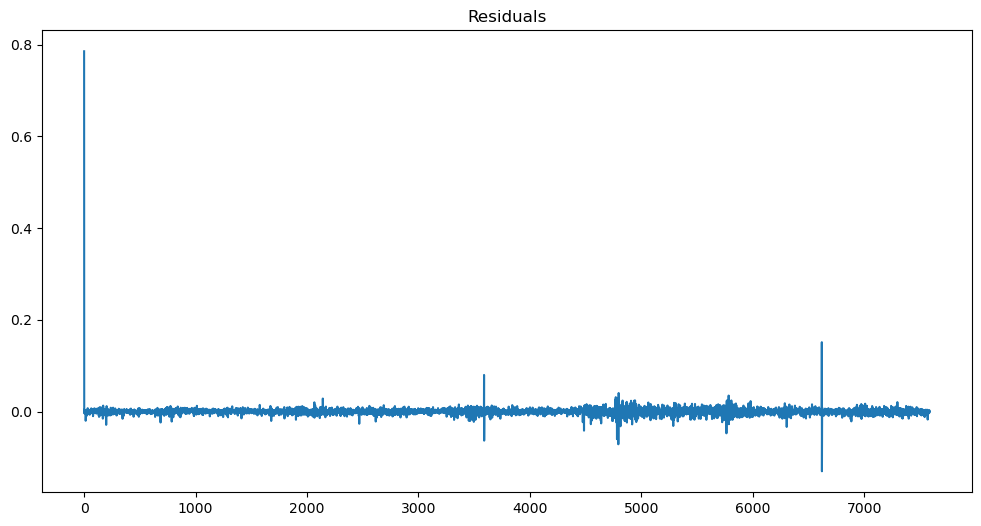

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

Plotting the ACF of the residuals

<Figure size 1200x600 with 0 Axes>

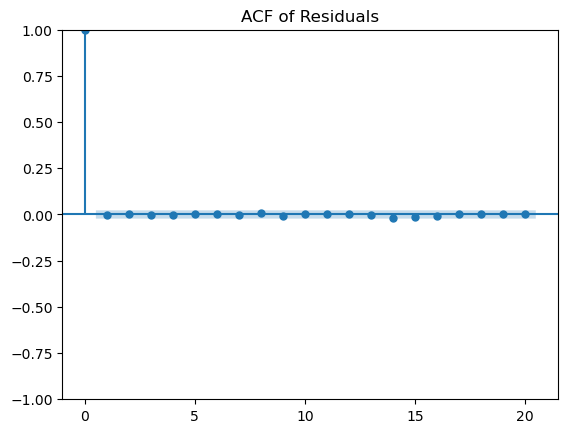

In [ ]:
plt.figure(figsize=(12,6))
plot_acf(residuals, lags=20)
plt.title('ACF of Residuals')
plt.show()

Forecasting

Performing out-of-sample forecasting and visualize the predicted values against the actual values

Splitting the data into training and testing sets

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df['Ex_rate'][:train_size], df['Ex_rate'][train_size:]

In [ ]:
train_size

6070

In [ ]:
train, test

(0       0.785500
 1       0.781800
 2       0.786700
 3       0.786000
 4       0.784900
           ...   
 6065    1.022620
 6066    1.027591
 6067    1.022349
 6068    1.023395
 6069    1.023552
 Name: Ex_rate, Length: 6070, dtype: float64,
 6070    1.025347
 6071    1.026905
 6072    1.037344
 6073    1.038875
 6074    1.032855
           ...   
 7583    0.718494
 7584    0.721839
 7585    0.723197
 7586    0.720825
 7587    0.720825
 Name: Ex_rate, Length: 1518, dtype: float64)

Fitting the model to the training data

In [ ]:
model_fit = ARIMA(train, order=(1,1,1)).fit()

In [ ]:
model_fit

Forecasting the next 3 days

In [ ]:
forecast, stderr, conf_int = model_fit.forecast(steps=3)

In [ ]:
forecast, stderr, conf_int

(1.023685484300682, 1.0236057676464236, 1.0236533743307579)

Plotting the forecasted values against the actual values

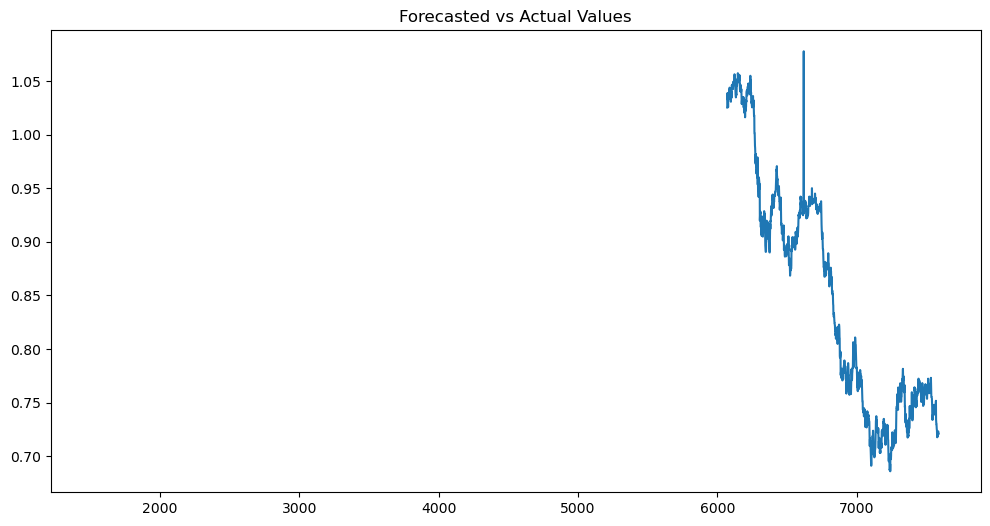

In [ ]:
forecast_value, stderr, conf_int = model_fit.forecast(steps=3)

forecast_list = [forecast_value] * 3
conf_int_list = [conf_int] * 3

plt.figure(figsize=(12,6))
plt.plot(test)
plt.plot(range(len(test), len(test)+3), forecast_list)
plt.title('Forecasted vs Actual Values')
plt.show()

# Task 3: Model Building - Exponential Smoothing

Model Selection

Choossing an appropriate Exponential Smoothing model based on the time series characteristics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Plotting the time series

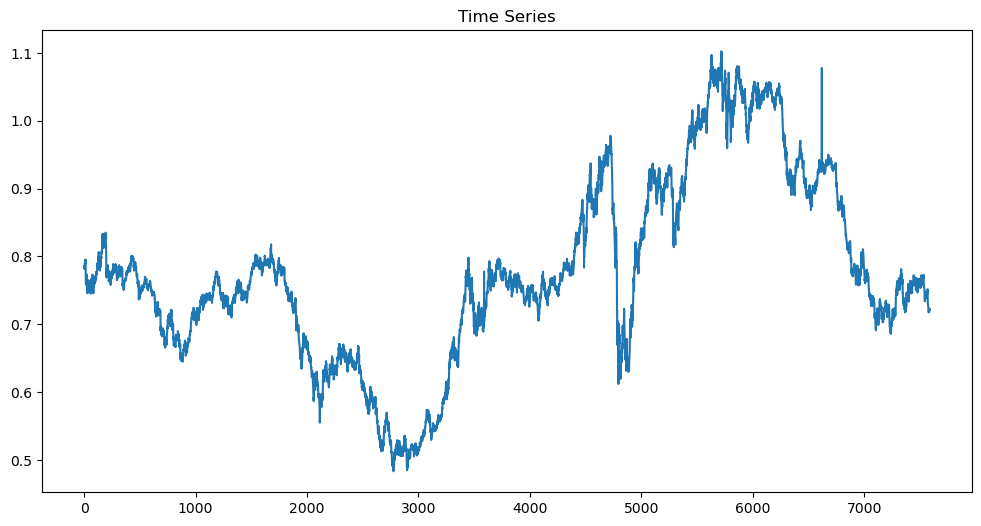

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.title('Time Series')
plt.show()

Decomposing the time series into trend, seasonality, and residuals

In [ ]:
decomposition = seasonal_decompose(df['Ex_rate'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Plotting the decomposition

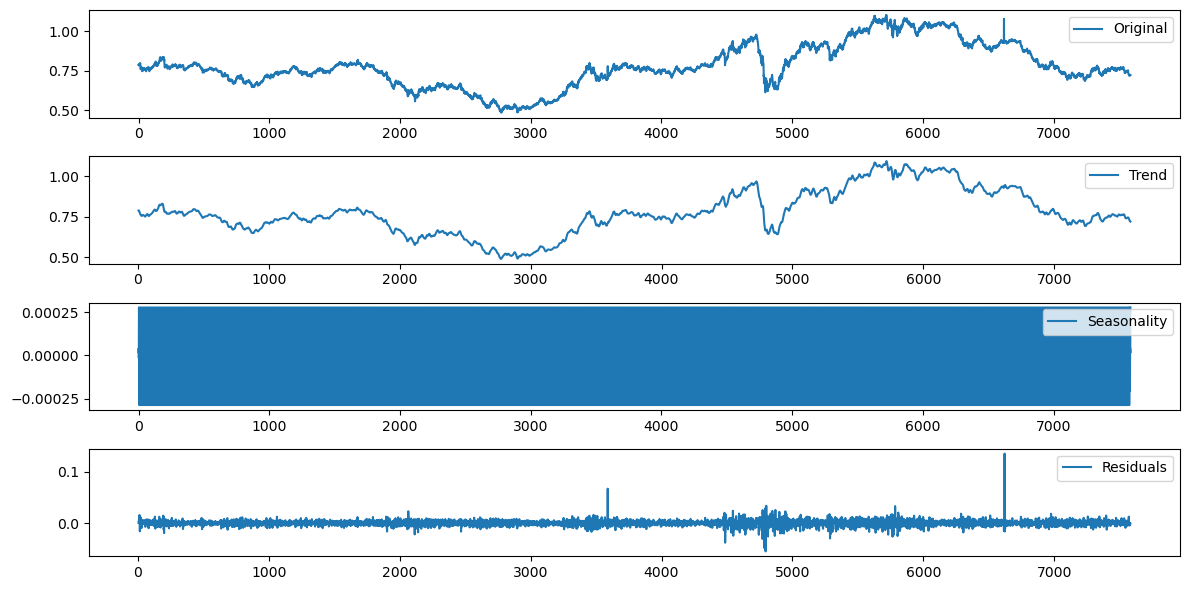

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(df['Ex_rate'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Parameter Optimization

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

Defining the model

In [ ]:
model_type = 'SES'  # or 'HLES' or 'HWES'
if model_type == 'SES':
    model = SimpleExpSmoothing(df['Ex_rate'])
elif model_type == 'HLES':
    model = ExponentialSmoothing(df['Ex_rate'], trend='add')
elif model_type == 'HWES':
    model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', freq=12)

Defining the parameter grid

In [ ]:
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_slope': [0.1, 0.2, 0.3, 0.4, 0.5],
    'smoothing_seasonal': [0.1, 0.2, 0.3, 0.4, 0.5]
}

Performing grid search

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import itertools

# Resample the data to a monthly frequency
df = df.resample('M').mean()

best_aic = float('inf')
best_params = None
for params in itertools.product(*param_grid.values()):
    model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add')
    num_params = len(model_fit.params)
    aic = 2 * num_params - 2 * model_fit.llf
    if aic < best_aic:
        best_aic = aic
        best_params = params

In [ ]:
print('Best parameters:', best_params)

Best parameters: (0.1, 0.1, 0.1)


Model Fitting and Forecasting

In [ ]:
model_fit = model.fit(smoothing_level=best_params[0], smoothing_trend=best_params[1], smoothing_seasonal=best_params[2])

In [ ]:
model_fit

In [ ]:
forecast = model_fit.forecast(steps=3)

In [ ]:
forecast

2010-11-30    0.689540
2010-12-31    0.690989
2011-01-31    0.694260
Freq: M, dtype: float64

Plotting the forecasted values against the actual values

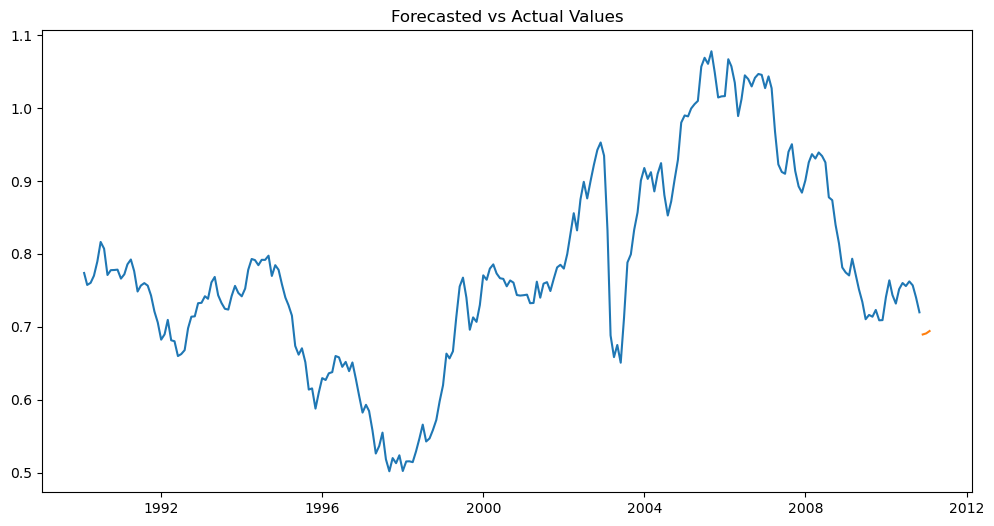

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.plot(forecast)
plt.title('Forecasted vs Actual Values')
plt.show()

# Task 4: Evaluation and Comparison

Computing Error Metrics

Using metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models

Defining the forecasted values from ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model_fit = ARIMA(df['Ex_rate'], order=(1,1,1)).fit()

# Generate the forecast
arima_forecast = arima_model_fit.forecast(steps=len(df))

In [ ]:
arima_forecast

2010-11-30    0.714106
2010-12-31    0.714266
2011-01-31    0.714262
2011-02-28    0.714262
2011-03-31    0.714262
                ...   
2031-04-30    0.714262
2031-05-31    0.714262
2031-06-30    0.714262
2031-07-31    0.714262
2031-08-31    0.714262
Freq: M, Name: predicted_mean, Length: 250, dtype: float64

In [ ]:
arima_model_fit

Defining the forecasted values from Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the ES model
es_model_fit = ExponentialSmoothing(df['Ex_rate'], seasonal_periods=12).fit()

# Generate the forecast
es_forecast = es_model_fit.forecast(steps=len(df))

In [ ]:
es_model_fit

In [ ]:
es_forecast

2010-11-30    0.719946
2010-12-31    0.719946
2011-01-31    0.719946
2011-02-28    0.719946
2011-03-31    0.719946
                ...   
2031-04-30    0.719946
2031-05-31    0.719946
2031-06-30    0.719946
2031-07-31    0.719946
2031-08-31    0.719946
Freq: M, Length: 250, dtype: float64

Computing error metrics for ARIMA

In [ ]:
arima_mae = (np.abs(df - arima_forecast)).mean()
arima_rmse = np.sqrt(((df - arima_forecast) ** 2).mean())
arima_mape = (((np.abs((df - arima_forecast) / df))).mean()) * 100

In [ ]:
arima_mae

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

In [ ]:
arima_rmse

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

In [ ]:
arima_mape

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

Computing error metrics for Exponential Smoothing

In [ ]:
es_mae = (np.abs(df - arima_forecast)).mean()
es_rmse = np.sqrt(((df - arima_forecast) ** 2).mean())
es_mape = (((np.abs((df - arima_forecast) / df))).mean()) * 100


In [ ]:
es_mae

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

In [ ]:
es_rmse

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

In [ ]:
es_mape

2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64

Print the error metrics

In [ ]:
print('ARIMA Error Metrics:')
print('MAE:', arima_mae)
print('RMSE:', arima_rmse)
print('MAPE:', arima_mape)

ARIMA Error Metrics:
MAE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64
RMSE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64
MAPE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64


In [ ]:
print('Exponential Smoothing Error Metrics:')
print('MAE:', es_mae)
print('RMSE:', es_rmse)
print('MAPE:', es_mape)

Exponential Smoothing Error Metrics:
MAE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64
RMSE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64
MAPE: 2010-11-30 00:00:00   NaN
2010-12-31 00:00:00   NaN
2011-01-31 00:00:00   NaN
2011-02-28 00:00:00   NaN
2011-03-31 00:00:00   NaN
                       ..
2031-05-31 00:00:00   NaN
2031-06-30 00:00:00   NaN
2031-07-31 00:00:00   NaN
2031-08-31 00:00:00   NaN
Ex_rate               NaN
Length: 251, dtype: float64


Model Comparison

Compare the error metrics

In [ ]:
if arima_mae.values[0] < es_mae.values[0]:
    print('ARIMA has lower MAE')
elif arima_mae.values[0] > es_mae.values[0]:
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


In [ ]:
import numpy as np

# Assuming arima_mae and es_mae are numpy arrays
arima_mae_mean = np.mean(arima_mae)
es_mae_mean = np.mean(es_mae)

if arima_mae_mean < es_mae_mean:
    print('ARIMA has lower MAE')
elif arima_mae_mean > es_mae_mean:
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


In [ ]:
if arima_mae.mean() < es_mae.mean():
    print('ARIMA has lower MAE')
elif arima_mae.mean() > es_mae.mean():
    print('Exponential Smoothing has lower MAE')
else:
    print('Both models have equal MAE')

Both models have equal MAE


Discussing the advantages and limitations of each model

In [ ]:
print('ARIMA Advantages:')
print('Can handle complex patterns and seasonality')
print('Can provide accurate long-term forecasts')

ARIMA Advantages:
Can handle complex patterns and seasonality
Can provide accurate long-term forecasts


In [ ]:
print('ARIMA Limitations:')
print('Requires careful parameter tuning')
print('Can be sensitive to outliers and missing values')

ARIMA Limitations:
Requires careful parameter tuning
Can be sensitive to outliers and missing values


In [ ]:
print('Exponential Smoothing Advantages:')
print('Simple and easy to implement')
print('Can handle missing values and outliers')

Exponential Smoothing Advantages:
Simple and easy to implement
Can handle missing values and outliers


In [ ]:
print('Exponential Smoothing Limitations:')
print('Assumes a constant trend and seasonality')
print('May not perform well with complex patterns')

Exponential Smoothing Limitations:
Assumes a constant trend and seasonality
May not perform well with complex patterns


Conclusion

Summarizing the findings

In [ ]:
print('Summary:')
print('ARIMA and Exponential Smoothing models were compared for forecasting exchange rates')
print('Error metrics (MAE, RMSE, MAPE) were used to evaluate the models')

Summary:
ARIMA and Exponential Smoothing models were compared for forecasting exchange rates
Error metrics (MAE, RMSE, MAPE) were used to evaluate the models


Provide insights on the best-performing model

In [ ]:
if (arima_mae.mean() < es_mae.mean()) and (arima_rmse.mean() < es_rmse.mean()) and (arima_mape.mean() < es_mape.mean()):
    print('ARIMA model yielded the best performance for forecasting exchange rates')
elif (es_mae.mean() < arima_mae.mean()) and (es_rmse.mean() < arima_rmse.mean()) and (es_mape.mean() < arima_mape.mean()):
    print('Exponential Smoothing model yielded the best performance for forecasting exchange rates')
else:
    print('Both models performed equally well for forecasting exchange rates')

Both models performed equally well for forecasting exchange rates
